In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("C:/Users/bhagy/Downloads/microsoft.zip")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313
...,...,...,...,...,...,...,...
1920,2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0,268.089996
1921,2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0,265.230011
1922,2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0,262.970001
1923,2022-08-31,267.109985,261.329987,265.390015,261.470001,24791800.0,261.470001


In [4]:
df=df[['Date','Close']]
df

,Date,Close
0,2015-01-12,46.599998
1,2015-01-13,46.360001
2,2015-01-14,45.959999
3,2015-01-15,45.480000
4,2015-01-16,46.240002
...,...,...
1920,2022-08-26,268.089996
1921,2022-08-29,265.230011
1922,2022-08-30,262.970001
1923,2022-08-31,261.470001


In [5]:
df['Date']

0       2015-01-12
1       2015-01-13
2       2015-01-14
3       2015-01-15
4       2015-01-16
           ...    
1920    2022-08-26
1921    2022-08-29
1922    2022-08-30
1923    2022-08-31
1924    2022-09-01
Name: Date, Length: 1925, dtype: object

In [6]:
import datetime

In [7]:
def str_to_datetime(s):
    split=s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_to_datetime('2015-01-12')
datetime_object

datetime.datetime(2015, 1, 12, 0, 0)

In [8]:
df

,Date,Close
0,2015-01-12,46.599998
1,2015-01-13,46.360001
2,2015-01-14,45.959999
3,2015-01-15,45.480000
4,2015-01-16,46.240002
...,...,...
1920,2022-08-26,268.089996
1921,2022-08-29,265.230011
1922,2022-08-30,262.970001
1923,2022-08-31,261.470001


In [9]:

df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

0      2015-01-12
1      2015-01-13
2      2015-01-14
3      2015-01-15
4      2015-01-16
          ...    
1920   2022-08-26
1921   2022-08-29
1922   2022-08-30
1923   2022-08-31
1924   2022-09-01
Name: Date, Length: 1925, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')

In [11]:
df

,Close
Date,
2015-01-12,46.599998
2015-01-13,46.360001
2015-01-14,45.959999
2015-01-15,45.480000
2015-01-16,46.240002
...,...
2022-08-26,268.089996
2022-08-29,265.230011
2022-08-30,262.970001


In [12]:
import matplotlib.pyplot as plt

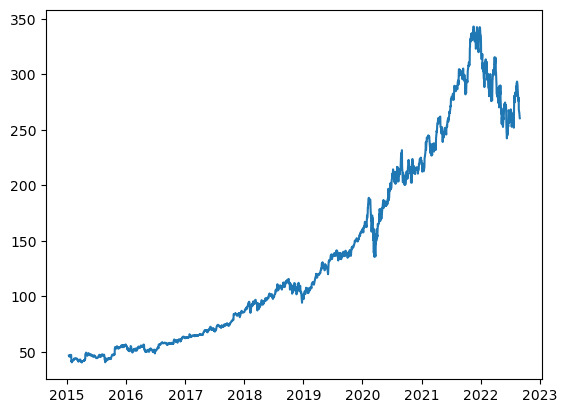

In [13]:
plt.plot(df.index,df['Close'])

In [27]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [28]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

In [29]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

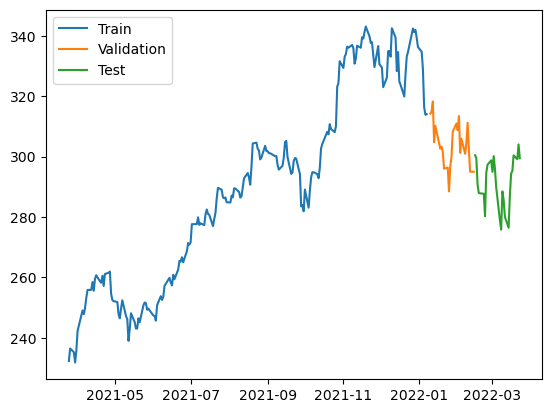

In [30]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 85066.9297 - mean_absolute_error: 289.9960 - val_loss: 91884.0625 - val_mean_absolute_error: 303.0364
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 83676.1562 - mean_absolute_error: 287.2654 - val_loss: 91271.5703 - val_mean_absolute_error: 302.0242
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 83009.9844 - mean_absolute_error: 285.9677 - val_loss: 90757.9609 - val_mean_absolute_error: 301.1727
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83850.2344 - mean_absolute_error: 287.5046 - val_loss: 90186.6719 - val_mean_absolute_error: 300.2227
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82601.7031 - mean_absolute_error: 286.2468 - val_loss: 89448.1016 - val_mean_absolute_error: 298.9901
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 82006.3125 - mean_absolute_error: 284.9601 - val_loss: 88390.9688 - val_mean_absolute_error: 297.2170
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1029.4059 - mean_absolute_error: 27.4244 - val_loss: 275.4624 - val_mean_absolute_error: 14.9809
Epoch 44/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1062.3212 - mean_absolute_error: 27.8302 - val_loss: 271.0793 - val_mean_absolute_error: 14.8451
Epoch 45/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 958.2711 - mean_absolute_error: 25.6429 - val_loss: 286.5306 - val_mean_absolute_error: 15.3181
Epoch 46/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1006.1658 - mean_absolute_error: 26.6675 - val_loss: 292.6809 - val_mean_absolute_error: 15.5020
Epoch 47/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 998.0507 - mean_absolute_error: 26.8716 - val_loss: 284.2689 - val_mean_absolute_error: 15.2516
Epoch 48/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1017.6852 - mean_absolute_error: 26.7231 - val_loss: 421.8630 - val_mean_absolute_error: 19.2615
Epoch 49/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1026.3174 - mean_abso

Epoch 87/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.9086 - mean_absolute_error: 3.6044 - val_loss: 92.2348 - val_mean_absolute_error: 8.0540
Epoch 88/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.7233 - mean_absolute_error: 4.0338 - val_loss: 71.5885 - val_mean_absolute_error: 7.0513
Epoch 89/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.3660 - mean_absolute_error: 3.7752 - val_loss: 43.6142 - val_mean_absolute_error: 5.4748
Epoch 90/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.0025 - mean_absolute_error: 3.4456 - val_loss: 56.5439 - val_mean_absolute_error: 6.2229
Epoch 91/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.0986 - mean_absolute_error: 3.6231 - val_loss: 43.2410 - val_mean_absolute_error: 5.4408
Epoch 92/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.7390 - mean_absolute_error: 3.5156 - val_loss: 43.6583 - val_mean_absolute_error: 5.4699
Epoch 93/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.8219 - mean_absolute_error: 3.29

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


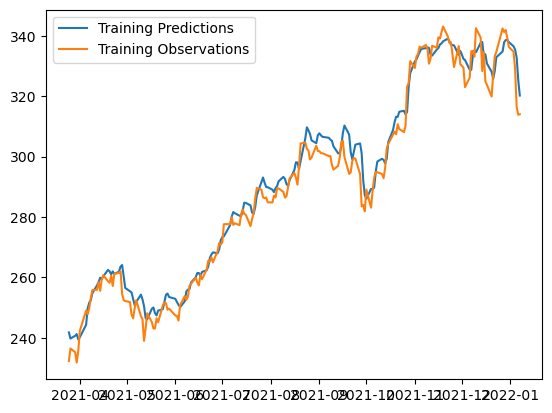

In [32]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


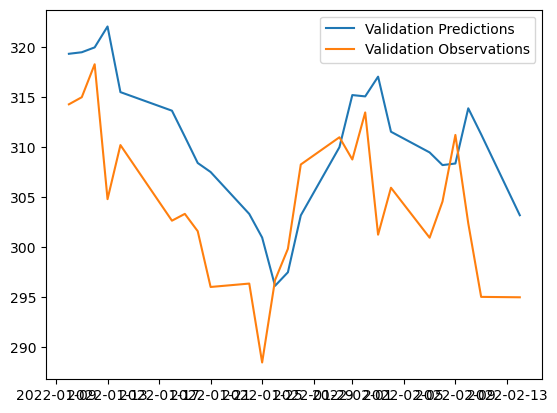

In [33]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


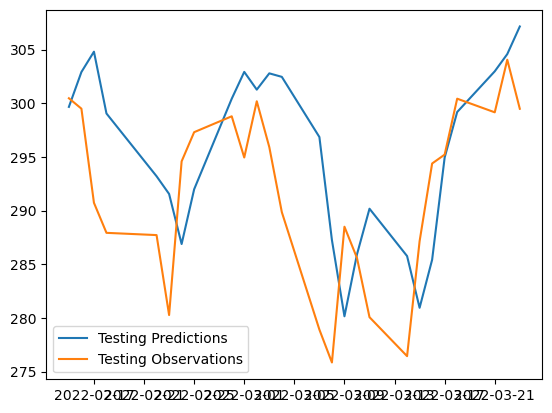

In [34]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

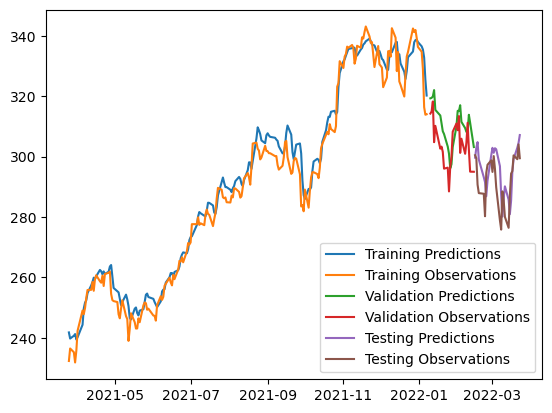

In [35]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [36]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

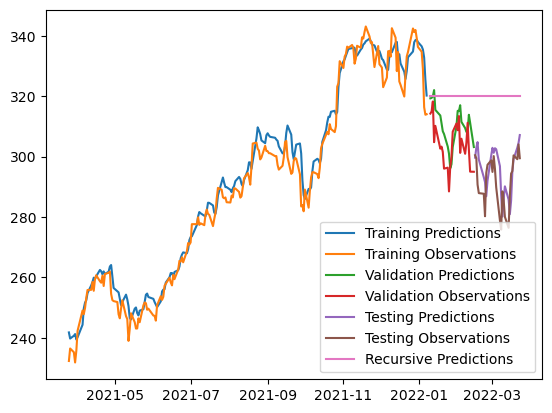

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])